<a href="https://colab.research.google.com/github/ashkanb77/Object-Detection-RetinaNet/blob/main/RetinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q torchmetrics

     |████████████████████████████████| 419 kB 12.8 MB/s 


In [2]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
import torch
from torch import nn
import torchvision
from torchvision.models.detection import retinanet_resnet50_fpn, RetinaNet_ResNet50_FPN_Weights
from torchvision.transforms.functional import to_tensor
from torch.utils.data import Dataset, DataLoader
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO
from tqdm import tqdm
import os.path
from typing import Any, Callable, Optional, Tuple, List
import cv2
import numpy as np
import copy


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
model = retinanet_resnet50_fpn(weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT).to(device)

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

In [6]:
model

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


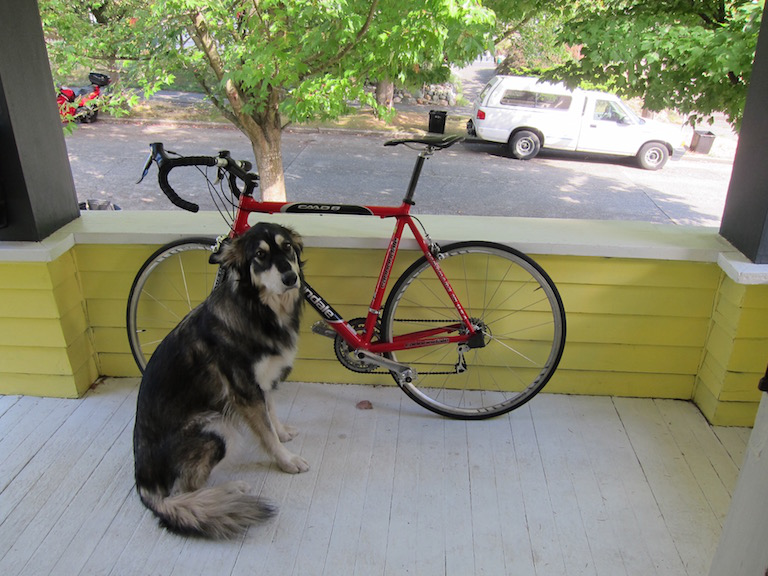

In [7]:
img_pil = Image.open('detection.jpg').convert('RGB')
img_pil

In [8]:
img = torchvision.transforms.functional.to_tensor(img_pil)

images = [img.to(device)]
model.eval()
with torch.no_grad():
  predictions = model(images)


In [9]:
predictions

[{'boxes': tensor([[1.2995e+02, 2.2121e+02, 3.1552e+02, 5.3876e+02],
          [1.5223e+02, 1.2611e+02, 5.6539e+02, 4.2951e+02],
          [4.7240e+02, 7.6511e+01, 6.8071e+02, 1.7112e+02],
          [4.7194e+02, 7.5566e+01, 6.8072e+02, 1.7023e+02],
          [1.5063e+02, 1.2772e+02, 5.6917e+02, 4.3286e+02],
          [1.4277e+02, 1.4089e+02, 4.1554e+02, 5.0593e+02],
          [1.5063e+02, 1.2772e+02, 5.6917e+02, 4.3286e+02],
          [5.5530e+01, 8.5382e+01, 1.0547e+02, 1.3459e+02],
          [7.1647e+02, 4.2712e+00, 7.6671e+02, 2.6542e+02],
          [1.3987e+02, 1.9328e+02, 3.8849e+02, 5.2816e+02],
          [1.3884e+02, 1.4316e+02, 2.5539e+02, 2.1509e+02],
          [1.3726e+02, 1.2729e+02, 5.6662e+02, 4.3873e+02],
          [1.2492e+02, 1.3297e+02, 4.2731e+02, 3.6608e+02],
          [1.3102e+02, 2.1627e+02, 3.1440e+02, 5.4026e+02],
          [1.3662e+02, 1.5337e+02, 3.8138e+02, 4.8194e+02],
          [1.4585e+02, 1.2444e+02, 5.6626e+02, 4.5464e+02],
          [1.3553e+02, 1.4418e+

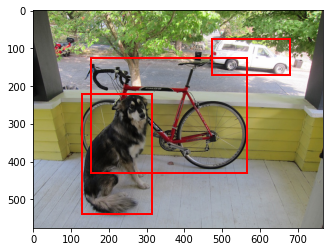

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

img_arr = img.permute(1, 2, 0).cpu().numpy()
plt.imshow(img_arr)

ax = plt.gca()

pred = predictions[0]
boxes = pred['boxes']
labels = pred['labels']
scores = pred['scores']

for box, label, score in zip(boxes.cpu(), labels.cpu(), scores.cpu()):
  if score > 0.6:
    rect = Rectangle(
        (box[0], box[1]),
        (box[2] - box[0]),
        (box[3] - box[1]),
        fill=False,
        edgecolor=(1, 0, 0),
        linewidth=2
    )
    ax.add_patch(rect)

plt.show()

In [11]:
! curl -L "https://public.roboflow.com/ds/eEm4SRJsX5?key=A6BpSIvNmR" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   884  100   884    0     0   3274      0 --:--:-- --:--:-- --:--:--  3274
100 38.9M  100 38.9M    0     0  31.1M      0  0:00:01  0:00:01 --:--:-- 50.7M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
 extracting: test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.f72b2

In [12]:
from pycocotools.coco import COCO

coco = COCO('/content/train/_annotations.coco.json')
ids = list(sorted(coco.imgs.keys()))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [13]:
coco.cats

{0: {'id': 0, 'name': 'vehicles', 'supercategory': 'none'},
 1: {'id': 1, 'name': 'Ambulance', 'supercategory': 'vehicles'},
 2: {'id': 2, 'name': 'Bus', 'supercategory': 'vehicles'},
 3: {'id': 3, 'name': 'Car', 'supercategory': 'vehicles'},
 4: {'id': 4, 'name': 'Motorcycle', 'supercategory': 'vehicles'},
 5: {'id': 5, 'name': 'Truck', 'supercategory': 'vehicles'}}

In [14]:
coco.loadImgs([0])

[{'date_captured': '2021-06-18T09:03:16+00:00',
  'file_name': '6f2cc554e1c2a402_jpg.rf.c82054d18cde5f4de867fb8c0b9cc178.jpg',
  'height': 416,
  'id': 0,
  'license': 1,
  'width': 416}]

In [15]:
coco.loadAnns(coco.getAnnIds([0]))

[{'area': 586.25,
  'bbox': [81, 236, 33.5, 17.5],
  'category_id': 3,
  'id': 0,
  'image_id': 0,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 825,
  'bbox': [117, 237, 37.5, 22],
  'category_id': 3,
  'id': 1,
  'image_id': 0,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 567,
  'bbox': [157, 236, 27, 21],
  'category_id': 3,
  'id': 2,
  'image_id': 0,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 768,
  'bbox': [193, 239, 32, 24],
  'category_id': 3,
  'id': 3,
  'image_id': 0,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 736,
  'bbox': [243, 243, 32, 23],
  'category_id': 3,
  'id': 4,
  'image_id': 0,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 861,
  'bbox': [373, 251, 42, 20.5],
  'category_id': 3,
  'id': 5,
  'image_id': 0,
  'iscrowd': 0,
  'segmentation': []}]

In [16]:
coco.loadCats([0])

[{'id': 0, 'name': 'vehicles', 'supercategory': 'none'}]

In [17]:
class CocoDetection(Dataset):


    def __init__(self, root, annFile, transforms = None):
        
        self.coco = COCO(annFile)
        self.ids = list(sorted(self.coco.imgs.keys()))
        self.root = root
        self.annFile = annFile
        self.transforms = transforms

    def _load_image(self, id: int) -> Image.Image:
        path = self.coco.loadImgs(id)[0]["file_name"]
        return Image.open(os.path.join(self.root, path)).convert("RGB")

    def _load_target(self, id: int) -> List[Any]:
        return self.coco.loadAnns(self.coco.getAnnIds(id))


    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)

        targets = {
            'boxes': torch.tensor([item['bbox'] for item in target]),
            'labels': torch.tensor([item['category_id'] for item in target])
        }

        if self.transforms is not None:
            image = to_tensor(image).permute(1, 2, 0).numpy()
            transformed = self.transforms(
                image=image, bboxes=targets['boxes'],
                 category_ids=targets['labels']
            )
            image = torch.tensor(transformed['image']).permute(2, 0, 1)
            targets['boxes'] = torch.tensor(transformed['bboxes'])
            targets['labels'] = torch.tensor(transformed['category_ids'])

        else:
            image = to_tensor(image)

        if targets['boxes'].numel() > 0:
            targets['boxes'][:, 2] += targets['boxes'][:, 0]
            targets['boxes'][:, 3] += targets['boxes'][:, 1]
        else:
            targets = {}


        return image, targets


    def __len__(self) -> int:
        return len(self.ids)


In [18]:
def get_loader(root, json, transforms=None, batch_size=1, shuffle=True):

    def get_concat(batch):
        return tuple(zip(*batch))

    dataset = CocoDetection(root, json, transforms)

    data_loader = DataLoader(
        dataset, batch_size, shuffle,
        collate_fn=get_concat
    )

    return data_loader, dataset

In [19]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2, inp_type='xy'):
    """Visualizes a single bounding box on the image"""
    # x_min, y_min, w, h = bbox
    # x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)


    if inp_type == 'xy':
        x_min, y_min, x_max, y_max = (int(b) for b in bbox)
    else:
        x_min, y_min, w, h = bbox
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name, inp_type='xy'):
    img = image.copy() * 255
    img = img.astype(np.int16)
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, inp_type=inp_type)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [20]:
train_loader, train_dataset = get_loader(
    '/content/train/', '/content/train/_annotations.coco.json',
    batch_size=1, shuffle=True
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [21]:
next(iter(train_loader))

((tensor([[[0.8157, 0.8157, 0.8196,  ..., 0.3059, 0.3098, 0.3255],
           [0.8157, 0.8157, 0.8196,  ..., 0.2941, 0.2863, 0.2941],
           [0.8196, 0.8196, 0.8196,  ..., 0.3020, 0.2824, 0.2784],
           ...,
           [0.4941, 0.5686, 0.5451,  ..., 0.6235, 0.6627, 0.6275],
           [0.4941, 0.5333, 0.5098,  ..., 0.5765, 0.5922, 0.6314],
           [0.4510, 0.4902, 0.5451,  ..., 0.5529, 0.6314, 0.7176]],
  
          [[0.8314, 0.8314, 0.8353,  ..., 0.2941, 0.2980, 0.3137],
           [0.8314, 0.8314, 0.8353,  ..., 0.2824, 0.2745, 0.2824],
           [0.8314, 0.8314, 0.8275,  ..., 0.2902, 0.2706, 0.2667],
           ...,
           [0.4863, 0.5608, 0.5373,  ..., 0.6039, 0.6431, 0.6078],
           [0.4863, 0.5255, 0.5020,  ..., 0.5569, 0.5725, 0.6118],
           [0.4431, 0.4824, 0.5373,  ..., 0.5333, 0.6118, 0.6980]],
  
          [[0.8745, 0.8745, 0.8784,  ..., 0.2196, 0.2235, 0.2392],
           [0.8745, 0.8745, 0.8784,  ..., 0.2157, 0.2078, 0.2157],
           [0.8667, 0.

(416, 416, 3)
[[ 24.  282.   80.5 333.5]
 [112.  279.  164.5 333.5]]
[3 3]
['vehicles', 'Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']


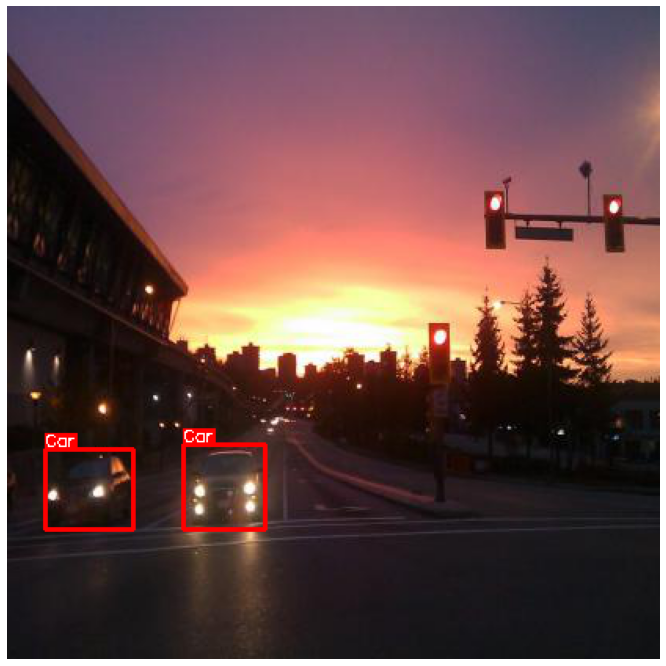

In [22]:
images, targets = next(iter(train_loader))

image = images[0].permute(1, 2, 0).numpy()
print(image.shape)

bboxes = targets[0]['boxes'].numpy()
print(bboxes)

category_ids = targets[0]['labels'].numpy()
print(category_ids)

cats = train_dataset.coco.loadCats(train_dataset.coco.getCatIds())
category_id_to_name = [cat['name'] for cat in cats]
print(category_id_to_name)

visualize(image, bboxes, category_ids, category_id_to_name)

# Data Augmentation

In [23]:
import albumentations as A

In [24]:
transforms = A.Compose([
        A.HorizontalFlip(p=0.5)
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

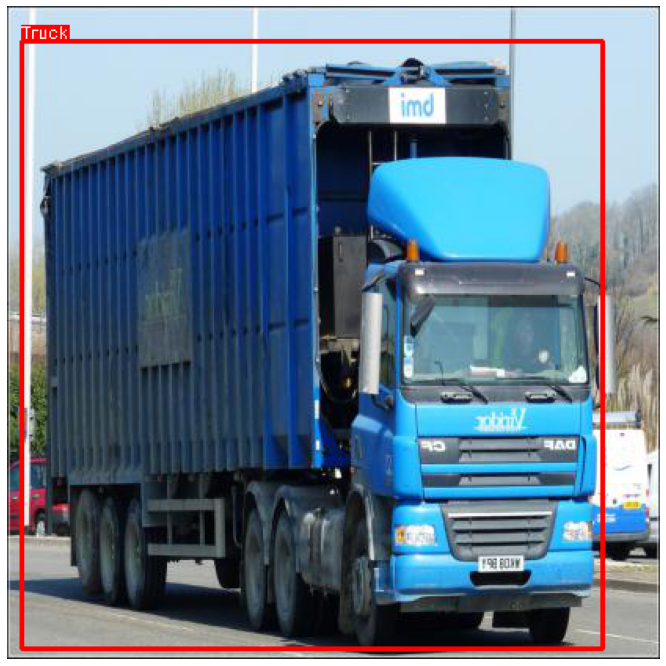

In [25]:
images, targets = next(iter(train_loader))

image = images[0].permute(1, 2, 0).numpy()

bboxes = targets[0]['boxes'].numpy()

category_ids = targets[0]['labels'].numpy()

cats = train_dataset.coco.loadCats(train_dataset.coco.getCatIds())
category_id_to_name = [cat['name'] for cat in cats]


bboxes[:, 2] -= bboxes[:, 0] 
bboxes[:, 3] -= bboxes[:, 1]

transformed = transforms(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
    inp_type='wh'
)

In [26]:
train_loader, train_dataset = get_loader(
    '/content/train/', '/content/train/_annotations.coco.json',
    transforms=transforms, batch_size=1, shuffle=True
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [27]:
def visualize_augmentation(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        image, targets = dataset[idx]
        image = image.permute(1, 2, 0).numpy()
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    
    plt.tight_layout()
    plt.show()

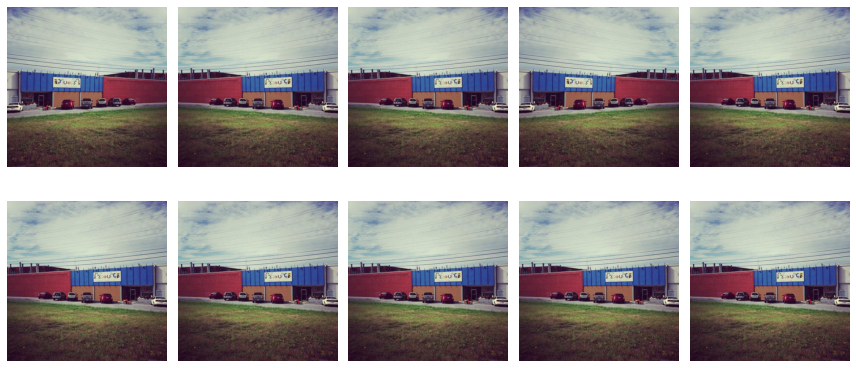

In [28]:
visualize_augmentation(train_dataset)

# Fine-Tune

In [29]:

class Checkpoint:

    def __init__(self, model, file_name, dir_path):
        self.map = 0
        self.folder = dir_path
        self.model = model
        self.file_name = file_name
        os.makedirs(self.folder, exist_ok=True)

    def save(self, m_ap):

        if m_ap > self.map:
            state = {
                'model': self.model.state_dict(),
                'map': m_ap,
            }
            path = os.path.join(os.path.abspath(self.folder), self.file_name + '.pth')
            torch.save(state, path)
            self.map = m_ap


In [30]:
def train(model, train_dataloader, val_dataloader, checkpoint, optimizer, epochs, plot=True):

    losses = []
    val_losses = []

    model.train()

    for epoch in range(epochs):
        total_loss = 0
        n_batches = len(train_dataloader)

        model.train()
        with tqdm(train_dataloader, unit="batch") as tepoch:

            for (images, targets) in tepoch:
                tepoch.set_description(f"Epoch {epoch + 1}")

                images = [img.to(device) for img in images]
                targets = [{k:v.to(device) for k, v in t.items()} for t in targets]

                optimizer.zero_grad()
                loss_dict = model(images, targets)
                loss = sum(loss for loss in loss_dict.values())

                loss.backward()
                optimizer.step()
                total_loss += loss.item()

                tepoch.set_postfix(loss=loss.item())

        total_loss = total_loss / n_batches

        losses.append(total_loss)

        print(
            f"Epoch {epoch + 1}: Train Loss: {total_loss:.4}"
        )

        m_ap = eval(model, val_dataloader, checkpoint)
        print(m_ap)

    if plot:
        plt.title('Loss')
        plt.plot(losses, label='Loss')
        plt.legend(loc='best')
        plt.show()

    

def eval(model, val_dataloader, checkpoint):
    metrics = MeanAveragePrecision()

    model.eval()
    m_ap = None

    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(val_dataloader):

            images = [img.to(device) for img in images]
            targets = [{k:v.to(device) for k, v in t.items()} for t in targets]

            preds = model(images)

            metrics.update(preds, targets)
            ap = metrics.compute()
            if m_ap is not None:
                m_ap = {
                    k: v + ap[k] for k, v in m_ap.items()
                }
            else:
                m_ap = ap

    m_ap = {k:v/(batch_idx+1) for k, v in m_ap.items()}

    checkpoint.save(m_ap['map'])

    return m_ap




In [31]:
train_dataloader, train_dataset = get_loader(
    '/content/train/', '/content/train/_annotations.coco.json',
    transforms=transforms, batch_size=8, shuffle=True
)

val_dataloader, val_dataset = get_loader(
    '/content/valid/', '/content/valid/_annotations.coco.json',
    batch_size=8, shuffle=True
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), 0.001)
checkpoint = Checkpoint(model, 'RetinaNet', 'checkpoints')

train(
    model, train_dataloader, val_dataloader, checkpoint, optimizer, 5
    )

Epoch 1:  44%|████▎     | 48/110 [01:21<01:46,  1.71s/batch, loss=1.07]

In [34]:
eval(model, val_dataloader, checkpoint)

{'map': tensor(0.0702), 'map_50': tensor(0.1741), 'map_75': tensor(0.0054), 'map_small': tensor(0.), 'map_medium': tensor(0.0002), 'map_large': tensor(0.0858), 'mar_1': tensor(0.0781), 'mar_10': tensor(0.3240), 'mar_100': tensor(0.4083), 'mar_small': tensor(0.), 'mar_medium': tensor(0.0750), 'mar_large': tensor(0.4667), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.)}
{'map': tensor(0.0616), 'map_50': tensor(0.1430), 'map_75': tensor(0.0253), 'map_small': tensor(0.), 'map_medium': tensor(0.0003), 'map_large': tensor(0.0666), 'mar_1': tensor(0.0875), 'mar_10': tensor(0.3558), 'mar_100': tensor(0.4183), 'mar_small': tensor(0.), 'mar_medium': tensor(0.1000), 'mar_large': tensor(0.4448), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.)}
{'map': tensor(0.0557), 'map_50': tensor(0.1278), 'map_75': tensor(0.0212), 'map_small': tensor(0.), 'map_medium': tensor(0.0282), 'map_large': tensor(0.0655), 'mar_1': tensor(0.2612), 'mar_10': tensor(0.3581), 'mar_100': tensor

KeyboardInterrupt: ignored

# Custom Retinanet

In [33]:
from torchvision.models.detection import RetinaNet
from torchvision.models.detection.anchor_utils import AnchorGenerator
from torchvision.models.mobilenetv2 import mobilenet_v2, MobileNet_V2_Weights

In [38]:
backbone = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT).features
backbone.out_channels = 1280 # output channels of mobilenet is 1280
backbone

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [37]:
anchors = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),
    aspect_ratios=((0.5, 1, 2))
)

In [39]:
model = RetinaNet(backbone, num_classes=7, anchor_generator=anchors).to(device)
model

RetinaNet(
  (backbone): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e

In [40]:
optimizer = torch.optim.Adam(model.parameters(), 0.001)
checkpoint = Checkpoint(model, 'RetinaNet', 'checkpoints')

train(
    model, train_dataloader, val_dataloader, checkpoint, optimizer, 5
    )

Epoch 1:   1%|          | 1/110 [01:31<2:45:42, 91.22s/batch, loss=2.37]


KeyboardInterrupt: ignored

# MobileNet with FPN 

In [41]:
from torchvision.models.detection.backbone_utils import BackboneWithFPN

## 1- BackboneWithFPN

In [90]:
return_layers = {'5': 0, '10': 1, '18': 2}
backbone = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT).features

in_channels_list = [32, 64, 1280]
out_channels = 256

backbone = BackboneWithFPN(backbone, return_layers, in_channels_list, out_channels)

print([
    (k, v.shape) for k, v in backbone(torch.randn((1, 3, 256, 256))).items()
])

[(0, torch.Size([1, 256, 32, 32])), (1, torch.Size([1, 256, 16, 16])), (2, torch.Size([1, 256, 8, 8])), ('pool', torch.Size([1, 256, 4, 4]))]


## 2- With Class

In [43]:
class FPNMobileNet(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        if pretrained:
            features = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT).features
        else:
            features = mobilenet_v2().features
        self.layer1= nn.Sequential(*features[0:4])
        self.layer2 = nn.Sequential(*features[4:7])
        self.layer3 = nn.Sequential(*features[7:11])
        self.layer4 = nn.Sequential(*features[11:19])
        for param in features.parameters():
            param.requires_grad = False

    def forward(self, x):

        # Bottom-up pathway, from ResNet
        enc0 = self.layer1(x) # 24
        enc1 = self.layer2(enc0) # 32
        enc2 = self.layer3(enc1) # 64
        enc3 = self.layer4(enc2) # 1280
        return enc3


def mobilenet_fpn_backbone(pretrained):
    backbone = FPNMobileNet(pretrained)
    # freeze layers
    for name, parameter in backbone.named_parameters():
        if 'layer2' not in name and 'layer3' not in name and 'layer4' not in name:
            parameter.requires_grad_(False)

    return_layers = {'layer1': 0, 'layer2': 1, 'layer3': 2, 'layer4': 3}

    in_channels_list = [
       24, 32, 64, 1280
    ]
    
    out_channels = 256
    return BackboneWithFPN(backbone, return_layers, in_channels_list, out_channels)

In [44]:
model = mobilenet_fpn_backbone(True)

In [45]:
print([
    (k, v.shape) for k, v in model(torch.randn((1, 3, 256, 256))).items()
])

[(0, torch.Size([1, 256, 64, 64])), (1, torch.Size([1, 256, 32, 32])), (2, torch.Size([1, 256, 16, 16])), (3, torch.Size([1, 256, 8, 8])), ('pool', torch.Size([1, 256, 4, 4]))]


# InterMediateLayerGetter, FPN

In [79]:
from torchvision.ops.feature_pyramid_network import FeaturePyramidNetwork
from torchvision.models._utils import IntermediateLayerGetter

In [82]:
backbone = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT).features

In [83]:
backbone

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [84]:
return_layers = {'5': 0, '10': 1, '18': 2}

In [85]:
m = IntermediateLayerGetter(backbone, return_layers)

In [86]:
print([
    (k, v.shape) for k, v in m(torch.randn((1, 3, 256, 256))).items()
])

[(0, torch.Size([1, 32, 32, 32])), (1, torch.Size([1, 64, 16, 16])), (2, torch.Size([1, 1280, 8, 8]))]


In [87]:
fpn = FeaturePyramidNetwork([32, 64, 1280], 256)

In [88]:
fpn

FeaturePyramidNetwork(
  (inner_blocks): ModuleList(
    (0): Conv2dNormActivation(
      (0): Conv2d(32, 256, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (layer_blocks): ModuleList(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
)

In [89]:
print([
    (k, v.shape) for k, v in fpn(m(torch.randn((1, 3, 256, 256)))).items()
])

[(0, torch.Size([1, 256, 32, 32])), (1, torch.Size([1, 256, 16, 16])), (2, torch.Size([1, 256, 8, 8]))]
